<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[9차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ 이미지 변환 방법에 대해 학습한다.<br>
   - 확대 / 축소, 이동, 회전, 기울림, 대칭, 원근 변환, 원근 보정
        
○ 이미지 증식 방법에 대해 학습한다.        
</font></td></tr>   
</table>        

# 이미지 변환

## 변환의 종류
 
  - 강체 변환(Ridid-Body transformation) : 이동, 회전
  - 유사 변환(Similarity Transformations) : 강체 변환 후 크기 변환
  - 선형 변환(Linear Transformation)
  - 원근변환(Projective Transformation)
  
  - Affine Transformations : (강체변환 + 유사변환) + 선형 변환 - 이동, 회전, 크기, 기울림, 반전 변환 

<figure>
       <img src="./lecture_image/09_affine_transform.png" width=40%>
    <center><figcaption><font size=1>참고 : 위키백과</font></figcaption></center>   
</figure>  
 

## 이미지 확대

- <font color=red>cv2.resize(src, (w, h), interpolation)</font> 
  - src를 w, h 만큼 크기로 변환
  
  
- interpolation : 보간법 (이미지 변환시 깨지는 부분을 보간)
  - cv2.INTER_NEAREST : 최근방 이웃 보간법 - 빠르지만 화질이 떨어짐, 잘 쓰이지 않음
  - cv2.INTER_LINEAR : 양선형 보간법 (2x2 이웃 픽셀 참조) - 효율이 가장 좋음, 속도도 빠르고 화질도 우수
  - cv2.INTER_CUBIC : 3차 회선 보간법 (4x4 이웃 픽셀 참조) - NTER_LINEAR보다 느리지만 화질이 더 우수
  - cv2.INTER_LANCZOS4 : Lanczos 보간법 (8x6 이웃 픽셀 참조) - 속도가 느리지만 화질이 더 우수
  - cv2.INTER_AREA : 영역적인 정보를 추출해서 결과 영상을 셋팅 - 영상 축소시 효과적인 방법 

(-0.5, 155.5, 149.5, -0.5)

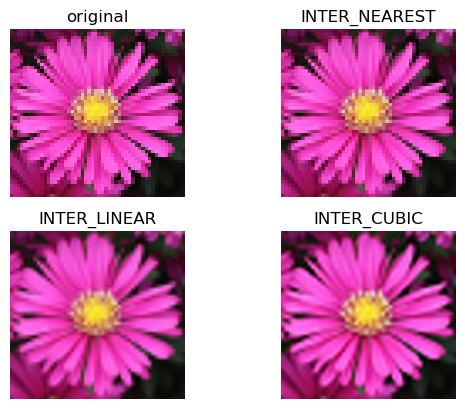

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("./image/flower1.png", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,1)
plt.title("original")
plt.imshow(img1)
plt.axis("off")



h, w, _ = img1.shape

# 이미지 확대
result1 = cv2.resize(img1, (w * 3, h* 3), interpolation=cv2.INTER_NEAREST)
plt.subplot(2,2,2)
plt.title("INTER_NEAREST")
plt.imshow(result1)
plt.axis("off")

result2 = cv2.resize(img1, (w * 3, h* 3), interpolation=cv2.INTER_LINEAR)
plt.subplot(2,2,3)
plt.title("INTER_LINEAR")
plt.imshow(result2)
plt.axis("off")

result3 = cv2.resize(img1, (w * 3, h* 3), interpolation=cv2.INTER_CUBIC)
plt.subplot(2,2,4)
plt.title("INTER_CUBIC")
plt.imshow(result3)
plt.axis("off")



(-0.5, 84.5, 128.5, -0.5)

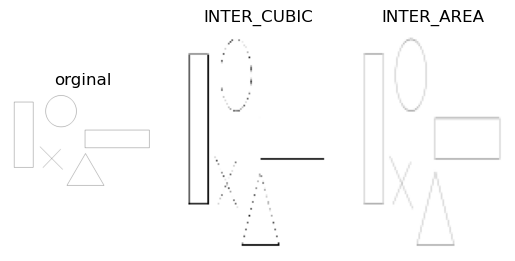

## 이미지 축소

- 이미지 축소 시 한 픽셀로 구성된 성분은 사라지게 되는 경우가 발생
  - 입력 영상을 부드럽게 필터링한 후에 축소를 하거나 여러번 축소를 반복 (cv2.INTER_AREA)

(-0.5, 128.5, 84.5, -0.5)

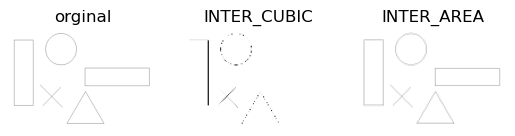

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("./image/shape.png", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title("orginal")
plt.axis("off")
h, w, _ = img1.shape
result1 = cv2.resize(img1, (int(w * 0.2), int(h * 0.2)),
                     interpolation=cv2.INTER_CUBIC)
plt.subplot(1, 3, 2)
plt.imshow(result1)
plt.title("INTER_CUBIC")
plt.axis("off")

result2 = cv2.resize(img1, (int(w * 0.2), int(h * 0.2)),
                     interpolation=cv2.INTER_AREA)
plt.subplot(1, 3, 3)
plt.imshow(result2)
plt.title("INTER_AREA")
plt.axis("off")

## 이미지 이동

- <font color=red>cv2.warpAffine(img, M, (w, h), dst, flags, borderValue)</font>
  - M : 행렬에 따른 affine 변환을 수행
  - (w, h) : 출력 이미지의 크기 
  - dst : 출력 영상에 대한 옵션
  - flags : 보간법 (cv2.INTER_LINEAR 등)
  - borderValue : 이동 후 빈공간 채우는 방식 (0 (검정색), cv2.BORDER_REFLECT(반사)

(-0.5, 511.5, 511.5, -0.5)

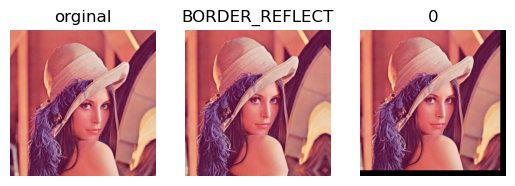

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("./image/lenna.png", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title("orginal")
plt.axis("off")
h, w, _ = img1.shape
# ( 20, 20 ) 만큼 이동 - 대각방향 이동 ( 왼쪽상단 )
M = np.float32([[1, 0, -20],
               [0, 1, -20]])
result2 = cv2.warpAffine(img1, M, (w, h), None,
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
plt.subplot(1, 3, 2)
plt.imshow(result2)
plt.title("BORDER_REFLECT")
plt.axis("off")


result3 = cv2.warpAffine(img1, M, (w, h), None,
                        cv2.INTER_LINEAR, 0)
plt.subplot(1, 3, 3)
plt.imshow(result3)
plt.title("0")
plt.axis("off")

## 이미지 회전

- <font color=red>cv2.getRotationMatrix2D(회전중심점, 각도, 확대비율)</font>

(-0.5, 511.5, 511.5, -0.5)

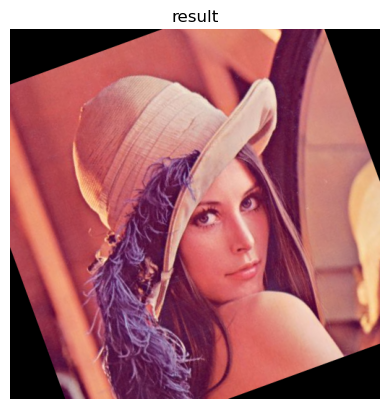

In [46]:
M = cv2.getRotationMatrix2D((w/2, h/2), 20, 1)

result = cv2.warpAffine(img1, M, (w, h), None, cv2.INTER_LINEAR, 0)


plt.imshow(result)
plt.title("result")
plt.axis("off")

## 이미지 기울림

<img src="./lecture_image/09_affine_transform2.png" width=40%>

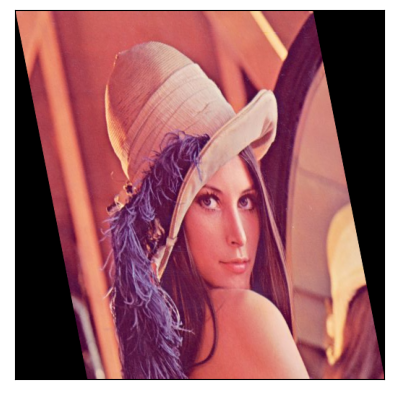

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("image/lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, channel = img.shape
pts_1 = np.float32([[0, 0], [512, 0], [0, 512]])
pts_2 = np.float32([[0, 0], [412, 0], [100, 512]])
M = cv2.getAffineTransform(pts_1, pts_2)
result = cv2.warpAffine(img, M, (w, h))
plt.xticks([])
plt.yticks([])
plt.imshow(result)
plt.show()

## 이미지 대칭

- <font color=red>cv2.flip(img, flipCode)</font>
  - flipCode : 대칭 방법
    - flipCode < 0 : 대각 대칭 
    - flipCode = 0 : 상하 대칭
    - flipCode > 0 : 좌우 대칭

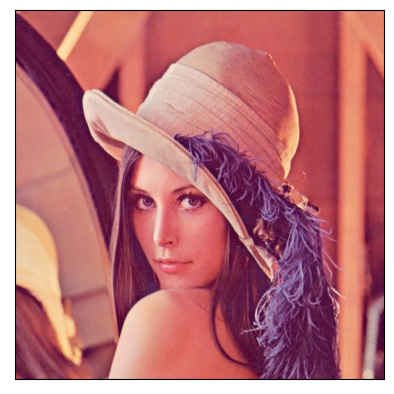

In [6]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("./image/lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.flip(img, flipCode=1)
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

## 원근 변환

- Affine 변환과는 달리 4개 점을 이용하여 이미지를 변환


- <font color=red>M = cv2.getPerspectiveTransform(pts1, pts2)</font>
  - pts1 좌표를 pts2 좌표로 원근 변환 설정


- <font color=red>result = cv2.warpPerspective(img, M, (w, h))</font>
  - 이미지, 변환값, 이미지 크기로 원근 변환 실행
  - (w, h) : 출력 이미지 크기

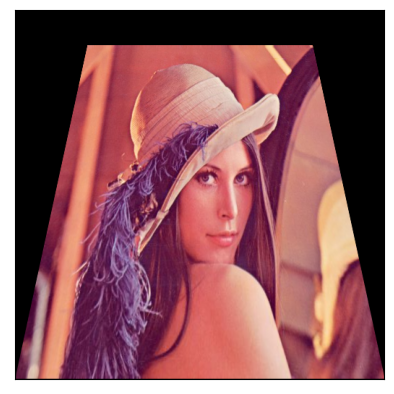

In [7]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("./image/lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, channel = img.shape
# 왼쪽위점, 오른쪽위점, 왼쪽아래점, 오른쪽아래점
pts1 = np.float32([[0, 0],[w, 0],[0, h],[w, h]])
pts2 = np.float32([[100, 50],[w-100, 50],[0, h],[w, h]])
M = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, M, (w, h))
plt.xticks([])
plt.yticks([])
plt.imshow(result)
plt.show()

## 원근 보정

- 원근 변환을 이용하여 기울어진 이미지를 보정하는 방법

<img src="./lecture_image/perspective.png" width=50%>

(-0.5, 535.5, 477.5, -0.5)

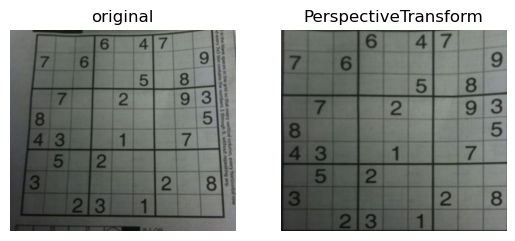

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("./image/hough.png", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("original")
plt.axis("off")

h, w, _ = img1.shape

pts1 = np.float32([[61,15], [476,10], [25,440], [505,445]])

pts2 = np.float32([[0,0], [w,0], [0,h], [w,h]])

M = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(img1, M, (w,h))

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("PerspectiveTransform")
plt.axis("off")

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다음과 같이 원본 이미지를 원근보정하기</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/09_perspective_transform.png" width=80%></td></tr>   
</table>

(-0.5, 535.5, 477.5, -0.5)

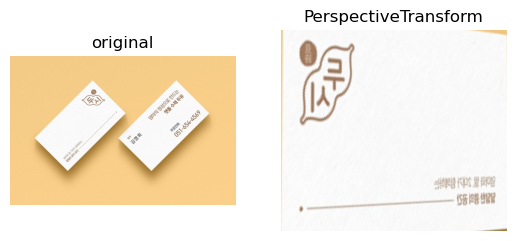

In [62]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
img_test = cv2.imread("./image/nametag.png", cv2.IMREAD_COLOR)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img_test)
plt.title("original")
plt.axis("off")

h, w, _ = img1.shape

pts1 = np.float32([[229,75], [62,218], [300,148], [155,308]])

pts2 = np.float32([[0,0], [w,0], [0,h], [w,h]])

M = cv2.getPerspectiveTransform(pts1, pts2)

result1 = cv2.warpPerspective(img_test, M, (w,h))

plt.subplot(1, 2, 2)
plt.imshow(result1)
plt.title("PerspectiveTransform")
plt.axis("off")

# 이미지 증식하기

- Image augmentation : 훈련 데이터가 적은 경우 훈련 데이터를 늘리는 방식

In [29]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

input_dir = "./image/augumentation/"
output_dir = "./image/output/"

# 이미지 불러오기
file_list = os.listdir(input_dir)
# 증식 횟수
epoch = 2
for file in file_list :
    img = cv2.imread(input_dir + file)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # 이미지의 파일명만 추출
    file_name = file.split(".")[0]
    h, w, ch = img.shape
    # 이미지 증식
    for i in range(epoch) :
        # 이미지 확대 / 축소 값 선택
#         param = random.uniform(0, 3)
        param = random.uniform(0.9, 1.1)
        
        # 확대
        if param >= 1.0 :
            img2 = cv2.resize(img, (int(w * param), int(h * param)),
                     interpolation = cv2.INTER_CUBIC)
        # 축소
        else :
            img2 = cv2.resize(img, (int(w * param), int(h * param)),
                     interpolation = cv2.INTER_AREA)
        # 이동 값
        param2 = random.randint(-10, 10)
        h, w, ch = img2.shape
        M = np.float32([[1, 0, param2],
                        [0, 1, 0]])
        img3 = cv2.warpAffine(img2, M, (w, h), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
        # 이동 값
        param2 = random.randint(-10, 10)
        h, w, ch = img3.shape
        M = np.float32([[1, 0, 0],
                        [0, 1, param2]])
        img4 = cv2.warpAffine(img3, M, (w, h), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
        # 회전값
        param = random.randint(-10, 10)
        h, w, ch = img4.shape
        if param == 0 :   # 왼쪽 회전
            M = cv2.getRotationMatrix2D((w / 2, h / 2), param, 1)
            img5 = cv2.warpAffine(img4, M, (w, h), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
        else :  # 오른쪽 회전
            M = cv2.getRotationMatrix2D((w / 2, h / 2), param, 1)
            img5 = cv2.warpAffine(img4, M, (w, h), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
        # 증식 이미지 저장
        cv2.imwrite(output_dir + "{}_{}.png".format(file_name, i), img5,
                    params=[cv2.IMWRITE_PNG_COMPRESSION, 0])

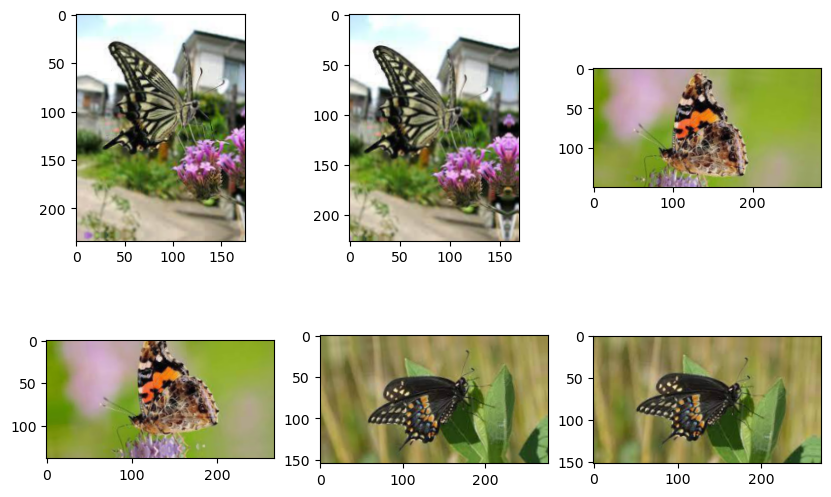

In [30]:
# 증식 결과 보기
plt.figure(figsize=(10, 5 * epoch))

co = 0

file_list = os.listdir(output_dir)

for file in file_list :
    co += 1
    img = cv2.imread(output_dir + file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(epoch + 1, 3, co)
    plt.imshow(img)

In [28]:
# 이미지 증식할 때, 확대축소비율은 10% 이하로, 회전도 10도 이내로 너무 많이 주면 안된다!

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 변환을 추가하여 이미지 증식을 수행해보자</font></td></tr>    
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[9차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ 변환의 종류
  - 강체 변환(Ridid-Body transformation) : 이동, 회전
  - 유사 변환(Similarity Transformations) : 강체 변환 후 크기 변환
  - 선형 변환(Linear Transformation)
  - 원근변환(Projective Transformation)
  - Affine Transformations : (강체변환 + 유사변환) + 선형 변환 - 이동, 회전, 크기, 기울림, 반전 변환

○ 이미지 확대 : <font color=red>cv2.resize(src, (w, h), interpolation)</font> 

○ 이미지 축소 :  보간법으로 cv2.INTER_AREA를 사용

○ 이미지 이동 : <font color=red>cv2.warpAffine(img, M, (w, h), dst, flags, borderValue)</font> 

○ 이미지 회전 : <font color=red>cv2.getRotationMatrix2D(회전중심점, 각도, 확대비율)</font> 

○ 이미지 대칭 : <font color=red>cv2.flip(img, flipCode)</font> 

○ 원근변환 : <font color=red>cv2.warpPerspective(img, M, (w, h))</font> 

○ Image augmentation : 훈련 데이터가 적은 경우 훈련 데이터를 늘리는 방식           
</font></td></tr>   
</table>
